In [1]:
from random import random, randint
import numpy as np
import pandas as pd

def make_sample(size: int) -> list:
    x, y = randint(0, 100), randint(0, 100)
    start_point = (x, y)
    points = [start_point]
    points += add_points(start_point, n=1, size=size)
    return points

def add_points(point: tuple, n: int, size: int) -> list:
    x, y = point
    zero_one = lambda : randint(0, 1)
    u, d, r = [zero_one() for _ in range(3)]
    points = []
    if u and n < size:
        points.append((x, y + 1))
        n += 1
    if d and n < size:
        points.append((x, y - 1))
        n += 1
    if r and n < size:
        points.append((x + 1, y))
        n += 1
        
    for p in points:
        new = add_points(p, n, size)
        points += new
        n += len(new)
    return points

def find_endges(cities: pd.DataFrame):
    checked = []
    edges = []
    for name, x, y, _ in cities.values:
        if name in checked:
            continue
        checked.append(name)
        q = f'(x=={x+1} & y=={y}) | (x=={x-1} & y=={y}) | (x=={x} & y=={y+1}) | (x=={x} & y=={y-1})'
        neighbours = cities.query(q)
        for n_name in neighbours.name:
            edges.append((name, n_name, randint(1, 24)))
            checked.append(n_name)
    return edges
        
def generate_csv(size: int, max_q: int=100, filename: str='sample') -> None:
    points = make_sample(size)
    points = [[f'city_{i}', x, y, randint(0, max_q)] for i, (x,y) in enumerate(points)]
    df_cities = pd.DataFrame(points, columns=['name', 'x', 'y', 'quantity'])
    df_edges = pd.DataFrame(find_endges(df_cities), columns=['city_from', 'city_to', 'time'])
    print(df_cities)
    print(df_edges)
    df_cities.to_csv(f'{filename}_cities.csv', index=False)
    df_edges.to_csv(f'{filename}_paths.csv', index=False)
    
    

In [17]:
import matplotlib.pyplot as plt

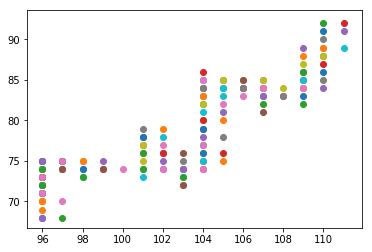

In [27]:
for x, y in make_sample(155):
    plt.scatter(x, y)

In [2]:
generate_csv(100)

       name   x   y  quantity
0    city_0  40  22        23
1    city_1  40  23        54
2    city_2  40  21        71
3    city_3  40  22        89
4    city_4  41  23        97
5    city_5  40  23         0
6    city_6  40  21        61
7    city_7  41  22        79
8    city_8  40  24         1
9    city_9  40  22        94
10  city_10  40  23        81
11  city_11  41  24         2
12  city_12  40  24        97
13  city_13  40  22        34
14  city_14  41  23        52
15  city_15  40  23        18
16  city_16  40  23        63
17  city_17  41  23        83
18  city_18  42  23        23
19  city_19  42  24        55
20  city_20  43  24        34
21  city_21  43  25         1
22  city_22  43  23        59
23  city_23  44  23        42
24  city_24  44  22         8
25  city_25  45  23        40
26  city_26  44  23        45
27  city_27  45  22        71
28  city_28  44  24         8
29  city_29  44  22        63
..      ...  ..  ..       ...
70  city_70  48  27        25
71  city_7